In [625]:
from IPython import get_ipython
from IPython.lib.deepreload import reload

In [626]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [627]:
import ptwt
import pywt
from PIL import Image
import torchvision.transforms as transforms
import torch

In [628]:
img = Image.open('/home/mikhail/Coding/EZWImageCompression/dog.png')
transform = transforms.ToTensor()
img_tensor = transform(img)

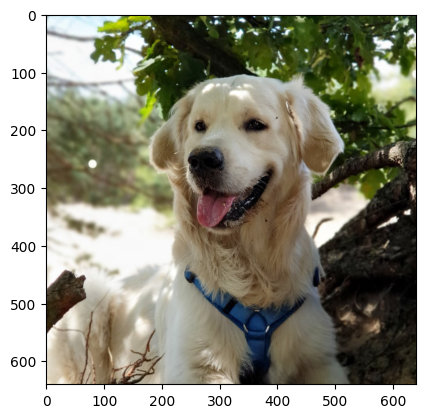

In [629]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor.permute(1, 2, 0))

In [630]:
t = pywt.wavedec2(img_tensor, 'haar',  level=2)

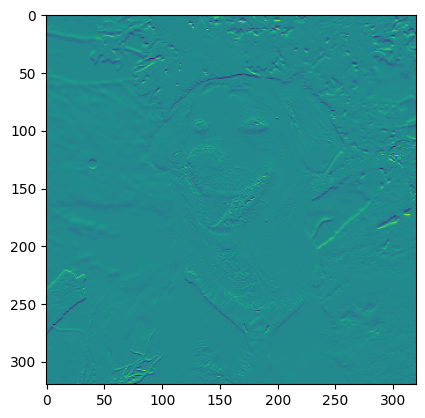

In [631]:
mat = t[2][0]
#mat = (mat - mat.min()) / (mat.max() - mat.min())
plt.imshow(mat[0])

In [632]:
from wavelet_augmentation import WaveletAugmentation

In [633]:
transform = WaveletAugmentation(6, proba=1., verbose=True)

In [634]:
collapsed = transform(img_tensor)

Note: 921052 elements are zero now.
Note: 190044 elements are zero now.
Note: 56806 elements are zero now.
Note: 7371 elements are zero now.
Note: 3227 elements are zero now.
Note: 287 elements are zero now.


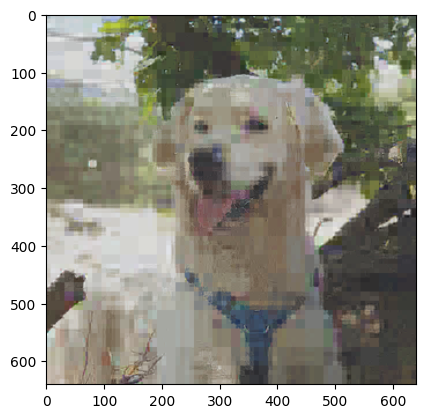

In [635]:
collapsed = (collapsed - collapsed.min()) / (collapsed.max() - collapsed.min())
plt.imshow(collapsed.permute(1, 2, 0))

In [636]:
torch.abs(collapsed - img_tensor).sum()

tensor(132680.8750)